In [45]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


We start by simulation a few trajectories in the potential 

$$ V(x) = -\frac{1}{2}(R_0-1) x^2 + \frac{1}{3}x^3$$

for $R_0 = .99$ assuming a stocastic process s.t. 

$$ dx = -\frac{dV(x)}{dx}dt + \sigma dW $$

where $dW$ is a step in a Wiener process with variance $\sigma^2$, where we shock the system (setting an initial condition) at $x_0$ and run for time $T$ or until the system reaches $x = 0$ equivalent to the outbrek dying out.


TODO
- What do we mean by fluctuation - do we initiate a fixed point or some "shock" to ask hw big the fluctutations get given some samll perturbation?(prob. this at is is like importing an infective)
- How do we determine scale on $\sigma$?
- Is the linearized results (from assuming the OU process) good estimates as variance diverges? - see $P_{ss}$ plots also
- The potential function only holds close to $R0 = 1$ so we cannot extrapolate too far.

Simulation 1 stopped at time t = 0.02 because x reached -0.0004
Simulation 2 stopped at time t = 0.10 because x reached -0.0015
Simulation 3 stopped at time t = 0.10 because x reached -0.0018
Simulation 4 stopped at time t = 0.01 because x reached -0.0086
Simulation 5 stopped at time t = 0.02 because x reached -0.0029
Simulation 6 stopped at time t = 4.90 because x reached -0.0064
Simulation 7 stopped at time t = 0.19 because x reached -0.0032
Simulation 8 stopped at time t = 0.01 because x reached -0.0028
Simulation 9 stopped at time t = 2.45 because x reached -0.0010
Simulation 10 stopped at time t = 0.03 because x reached -0.0042
Simulation 11 stopped at time t = 0.10 because x reached -0.0010
Simulation 12 stopped at time t = 0.01 because x reached -0.0052
Simulation 13 stopped at time t = 0.02 because x reached -0.0112
Simulation 14 stopped at time t = 0.02 because x reached -0.0092
Simulation 15 stopped at time t = 0.17 because x reached -0.0177
Simulation 16 stopped at time t = 

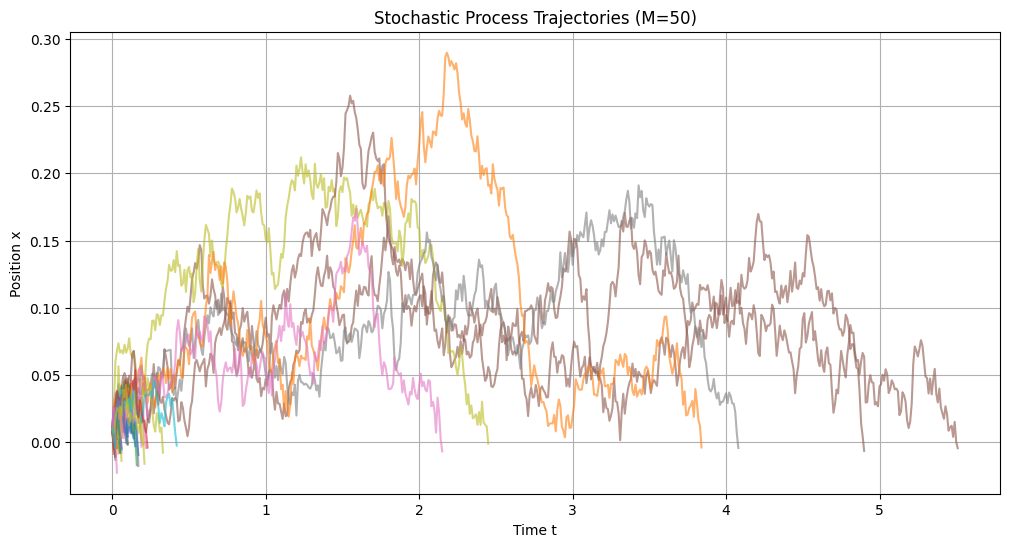

In [24]:
# Parameters
R0 = 0.5          # Control parameter R0 > 1
sigma = 0.1       # Standard deviation of the Gaussian noise
dt = 0.01         # Time step
T = 100            # Total time
N = int(T / dt)   # Maximum number of time steps
M = 50            # Number of simulations

# Potential function
def potential(x, R0):
    return -0.5 * (R0 - 1) * x**2 + (1/3) * x**3

# Force derived from the potential (negative gradient)
def force(x, R0):
    return -( - (R0 - 1) * x + x**2 )

# Initialize lists to store all trajectories
all_x = []    # List to store positions from all simulations
all_time = [] # List to store corresponding time arrays

# Simulate M stochastic processes
for sim in range(M):
    x = [0.01]  # Start at the fixed point x = R0 - 1
    time = [0]
    
    for i in range(1, N):
        deterministic = force(x[-1], R0) * dt
        stochastic = sigma * np.sqrt(dt) * np.random.normal()
        x_new = x[-1] + deterministic + stochastic

        # Check if x hits 0 or goes below
        if x_new <= 0:
            # Append the last position and time
            x.append(x_new)
            time.append(i * dt)
            print(f"Simulation {sim+1} stopped at time t = {i * dt:.2f} because x reached {x_new:.4f}")
            break

        x.append(x_new)
        time.append(i * dt)
    else:
        # If the loop didn't break, the simulation reached the maximum time
        print(f"Simulation {sim+1} reached the maximum time without hitting x <= 0")
    
    # Store the trajectory
    all_x.append(np.array(x))
    all_time.append(np.array(time))

# Plot all trajectories
plt.figure(figsize=(12, 6))
for i in range(M):
    plt.plot(all_time[i], all_x[i], label=f'Simulation {i+1}', alpha=0.6)

plt.xlabel('Time t')
plt.ylabel('Position x')
plt.title(f'Stochastic Process Trajectories (M={M})')
# If M is large, we might not want to show all labels
if M <= 10:
    plt.legend()
plt.grid(True)
plt.show()


Simulation 1 stopped at time t = 0.01 because x reached -0.0027
Simulation 2 stopped at time t = 7.34 because x reached -0.0030
Simulation 3 stopped at time t = 0.11 because x reached -0.0091
Simulation 4 stopped at time t = 0.04 because x reached -0.0112
Simulation 5 stopped at time t = 0.21 because x reached -0.0005
Simulation 6 stopped at time t = 0.26 because x reached -0.0041
Simulation 7 stopped at time t = 10.12 because x reached -0.0006
Simulation 8 stopped at time t = 0.07 because x reached -0.0137
Simulation 9 stopped at time t = 0.07 because x reached -0.0020
Simulation 10 stopped at time t = 0.04 because x reached -0.0099
Simulation 11 stopped at time t = 0.01 because x reached -0.0156
Simulation 12 stopped at time t = 0.01 because x reached -0.0063
Simulation 13 stopped at time t = 0.06 because x reached -0.0031
Simulation 14 stopped at time t = 0.09 because x reached -0.0134
Simulation 15 stopped at time t = 0.02 because x reached -0.0005
Simulation 16 stopped at time t =

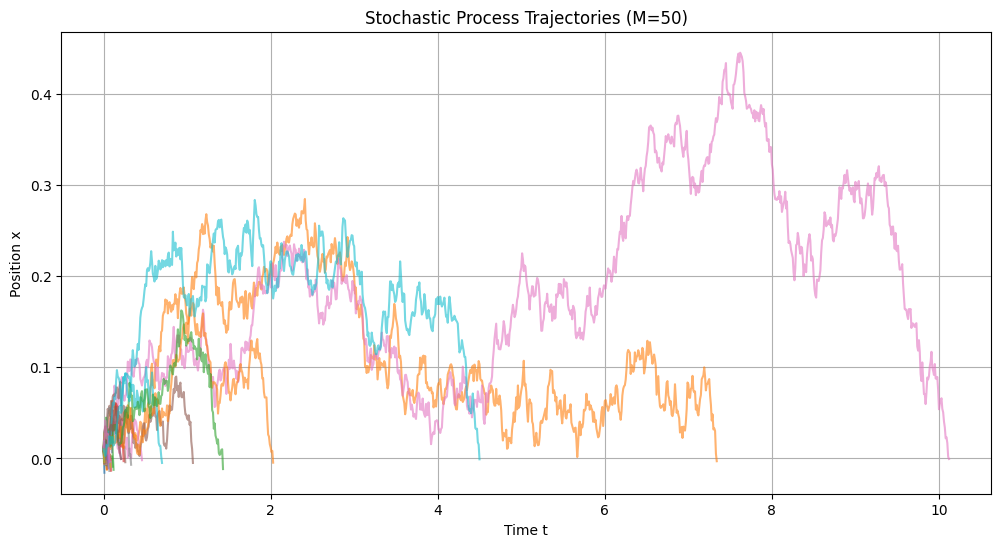

In [25]:
# Parameters
R0 = 0.9995          # Control parameter R0 > 1
sigma = 0.1       # Standard deviation of the Gaussian noise
dt = 0.01         # Time step
T = 100            # Total time
N = int(T / dt)   # Maximum number of time steps
M = 50            # Number of simulations

# Potential function
def potential(x, R0):
    return -0.5 * (R0 - 1) * x**2 + (1/3) * x**3

# Force derived from the potential (negative gradient)
def force(x, R0):
    return -( - (R0 - 1) * x + x**2 )

# Initialize lists to store all trajectories
all_x = []    # List to store positions from all simulations
all_time = [] # List to store corresponding time arrays

# Simulate M stochastic processes
for sim in range(M):
    x = [0.01]  # Start at the fixed point x = R0 - 1
    time = [0]
    
    for i in range(1, N):
        deterministic = force(x[-1], R0) * dt
        stochastic = sigma * np.sqrt(dt) * np.random.normal()
        x_new = x[-1] + deterministic + stochastic

        # Check if x hits 0 or goes below
        if x_new <= 0:
            # Append the last position and time
            x.append(x_new)
            time.append(i * dt)
            print(f"Simulation {sim+1} stopped at time t = {i * dt:.2f} because x reached {x_new:.4f}")
            break

        x.append(x_new)
        time.append(i * dt)
    else:
        # If the loop didn't break, the simulation reached the maximum time
        print(f"Simulation {sim+1} reached the maximum time without hitting x <= 0")
    
    # Store the trajectory
    all_x.append(np.array(x))
    all_time.append(np.array(time))

# Plot all trajectories
plt.figure(figsize=(12, 6))
for i in range(M):
    plt.plot(all_time[i], all_x[i], label=f'Simulation {i+1}', alpha=0.6)

plt.xlabel('Time t')
plt.ylabel('Position x')
plt.title(f'Stochastic Process Trajectories (M={M})')
# If M is large, we might not want to show all labels
if M <= 10:
    plt.legend()
plt.grid(True)
plt.show()

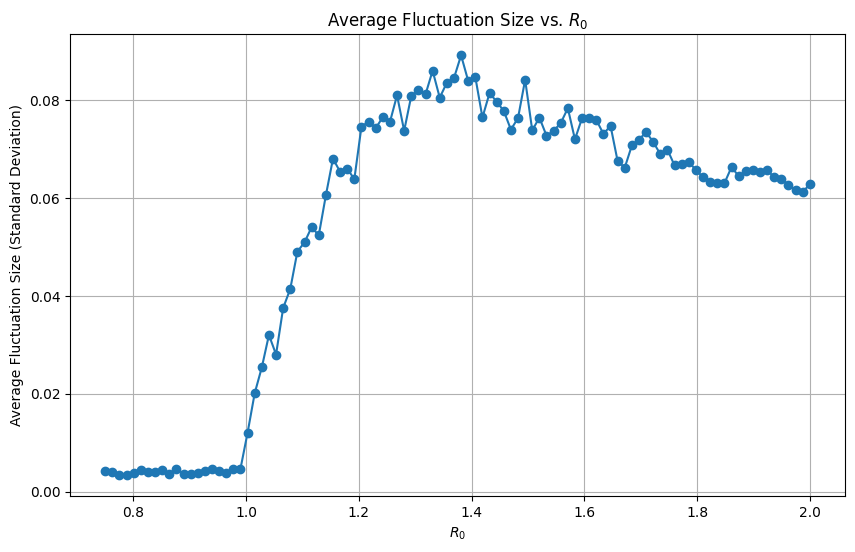

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sigma = 0.1       # Standard deviation of the Gaussian noise
dt = 0.01         # Time step
T = 10            # Total time
N = int(T / dt)   # Maximum number of time steps
M = 50            # Number of simulations per R0
R0_values = np.linspace(0.75, 2.0, 100)  # Range of R0 values

# Potential function
def potential(x, R0):
    return -0.5 * (R0 - 1) * x**2 + (1/3) * x**3

# Force derived from the potential (negative gradient)
def force(x, R0):
    return -( - (R0 - 1) * x + x**2 )

# Initialize lists to store results
fluctuation_sizes = []

# Loop over R0 values
for R0 in R0_values:
    fluctuation_sizes_per_R0 = []  # To store fluctuation sizes for current R0
    
    # Run M simulations for each R0
    for sim in range(M):
        x = [R0 - 1]  # Start at the fixed point x = R0 - 1
        time = [0]
        
        for i in range(1, N):
            deterministic = force(x[-1], R0) * dt
            stochastic = sigma * np.sqrt(dt) * np.random.normal()
            x_new = x[-1] + deterministic + stochastic

            # Check if x hits 0 or goes below
            if x_new <= 0:
                x.append(x_new)
                time.append(i * dt)
                break

            x.append(x_new)
            time.append(i * dt)
        
        # Convert x to numpy array
        x = np.array(x)
        
        # Calculate fluctuations (deviations from the mean position)
        fluctuations = x - np.mean(x)
        
        # Estimate fluctuation size (standard deviation)
        fluctuation_size = np.std(fluctuations)
        fluctuation_sizes_per_R0.append(fluctuation_size)
    
    # Compute average fluctuation size for current R0
    avg_fluctuation_size = np.mean(fluctuation_sizes_per_R0)
    fluctuation_sizes.append(avg_fluctuation_size)

# Plot average fluctuation size vs R0
plt.figure(figsize=(10, 6))
plt.plot(R0_values, fluctuation_sizes, marker='o')
plt.xlabel('$R_0$')
plt.ylabel('Average Fluctuation Size (Standard Deviation)')
plt.title('Average Fluctuation Size vs. $R_0$')
plt.grid(True)
plt.show()


100%|██████████| 1000/1000 [01:25<00:00, 11.70it/s]


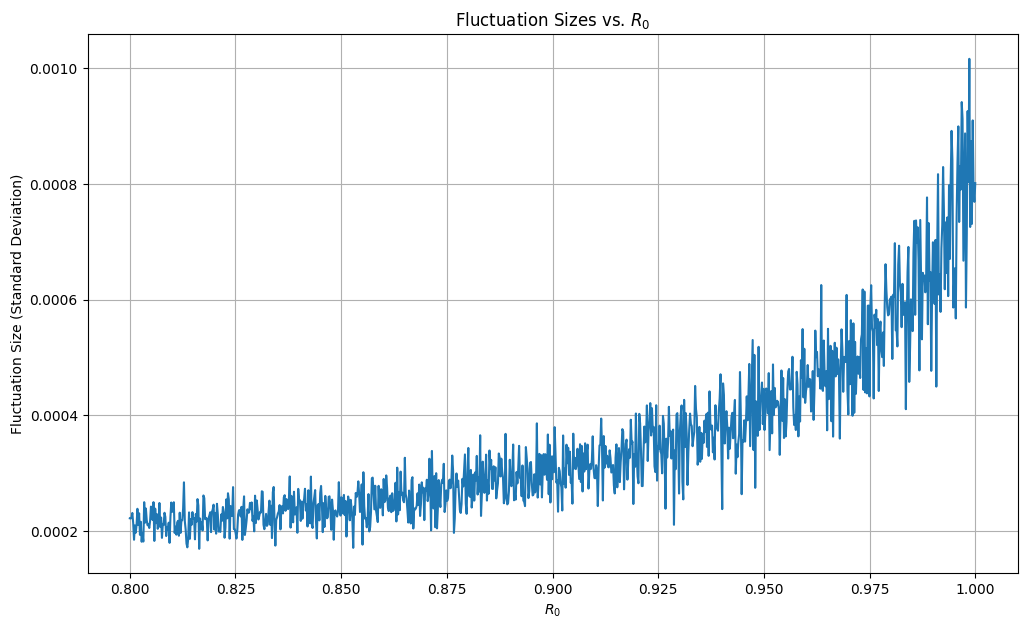

In [48]:
# Parameters
sigma = 0.01       # Standard deviation of the Gaussian noise
dt = 0.01         # Time step
T = 1000            # Total time
N = int(T / dt)   # Maximum number of time steps
M = 100           # Number of simulations per R0
R0_values = np.linspace(.8, 1.1, 1000)  # Range of R0 values

initial_shock = 0.01

# Potential function
def potential(x, R0):
    return -0.5 * (R0 - 1) * x**2 + (1/3) * x**3

# Force derived from the potential (negative gradient)
def force(x, R0):
    return -( - (R0 - 1) * x + x**3 )

# Initialize lists to store results
fluctuation_sizes = []
std_errors = []
fluctuation_sizes_per_R0_list = []  # List to store all fluctuation sizes for each R0

# Loop over R0 values
for R0 in tqdm(R0_values):
    fluctuation_sizes_per_R0 = []  # To store fluctuation sizes for current R0
    
    # Run M simulations for each R0
    for sim in range(M):
        x = [initial_shock]  # Start at the fixed point x = R0 - 1
        time = [0]
        
        for i in range(1, N):
            deterministic = force(x[-1], R0) * dt
            stochastic = sigma * np.sqrt(dt) * np.random.normal()
            x_new = x[-1] + deterministic + stochastic

            # Check if x hits 0 or goes below
            if x_new <= 0:
                x.append(x_new)
                time.append(i * dt)
                break

            x.append(x_new)
            time.append(i * dt)
        
        # Convert x to numpy array
        x = np.array(x)
        
        # Calculate fluctuations (deviations from the mean position)
        fluctuations = x - initial_shock#np.mean(x)
        
        # Estimate fluctuation size (standard deviation)
        fluctuation_size = np.std(fluctuations)
        fluctuation_sizes_per_R0.append(fluctuation_size)
    
    # Compute average fluctuation size and standard error for current R0
    avg_fluctuation_size = np.mean(fluctuation_sizes_per_R0)
    std_error = np.std(fluctuation_sizes_per_R0) / np.sqrt(M)
    
    fluctuation_sizes.append(avg_fluctuation_size)
    std_errors.append(std_error)
    fluctuation_sizes_per_R0_list.append(fluctuation_sizes_per_R0)


# Plot average fluctuation size vs R0 with error bars
plt.figure(figsize=(12, 7))
plt.plot(R0_values, std_errors)

# Plot all individual fluctuation sizes as scatter points
# for i, R0 in enumerate(R0_values):
#     y = fluctuation_sizes_per_R0_list[i]
#     x = np.full(len(y), R0)
#     # Add some jitter to x for better visualization
#     x_jitter = x + np.random.uniform(-0.015, 0.015, size=len(y))
#     plt.scatter(x, y, alpha=0.4, color='gray', edgecolors='none')


plt.xlabel('$R_0$')
plt.ylabel('Fluctuation Size (Standard Deviation)')
plt.title('Fluctuation Sizes vs. $R_0$')
plt.grid(True)
plt.show()


100%|██████████| 1000/1000 [02:33<00:00,  6.50it/s]


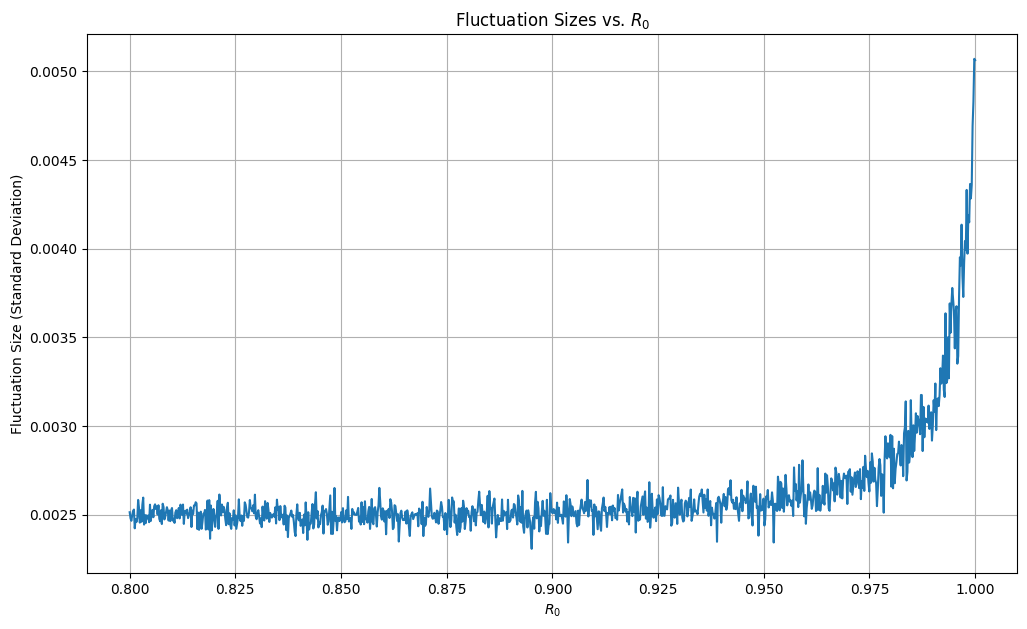

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters
sigma = 0.001       # Standard deviation of the Gaussian noise
dt = 0.01          # Time step
T = 2000           # Total time
N = int(T / dt)    # Maximum number of time steps
M = 50            # Number of simulations per R0
R0_values = np.linspace(0.8, 1, 1000)  # Range of R0 values

#initial_shock = 0.01
sigma_sqrt_dt = sigma * np.sqrt(dt)

# Initialize lists to store results
fluctuation_sizes = []
std_errors = []

initial_shock = 0.01
# Loop over R0 values
for R0 in tqdm(R0_values):
    delta_R0 = R0 - 1


    # Initialize arrays
    x = np.full((N + 1, M), initial_shock)
    alive = np.ones(M, dtype=bool)
    stop_indices = np.full(M, N, dtype=int)

    for i in range(1, N + 1):
        x_prev = x[i - 1, :]
        deterministic = (delta_R0 * x_prev - x_prev**3) * dt
        stochastic = sigma_sqrt_dt * np.random.normal(size=M)
        x_new = x_prev + deterministic + stochastic

        # Update only alive simulations
        x[i, alive] = x_new[alive]
        # Check stopping condition
        newly_dead = x_new <= 0
        stop_indices[newly_dead & alive] = i
        alive &= ~newly_dead

        # Break if all simulations have stopped
        if not np.any(alive):
            x[(i + 1):, :] = x[i, :]
            break

    # Compute fluctuation sizes
    fluctuation_sizes_per_R0 = np.array([
        np.std(x[:stop_indices[sim] + 1, sim] - initial_shock)
        for sim in range(M)
    ])

    # Compute average fluctuation size and standard error for current R0
    avg_fluctuation_size = np.mean(fluctuation_sizes_per_R0)
    std_error = np.std(fluctuation_sizes_per_R0) / np.sqrt(M)

    fluctuation_sizes.append(avg_fluctuation_size)
    std_errors.append(std_error)

# Convert results to numpy arrays
fluctuation_sizes = np.array(fluctuation_sizes)
std_errors = np.array(std_errors)

# Plot average fluctuation size vs R0 with error bars
plt.figure(figsize=(12, 7))
plt.plot(R0_values, fluctuation_sizes, markersize=2)
plt.xlabel('$R_0$')
plt.ylabel('Fluctuation Size (Standard Deviation)')
plt.title('Fluctuation Sizes vs. $R_0$')
plt.grid(True)
plt.show()


100%|██████████| 1000/1000 [01:14<00:00, 13.35it/s]


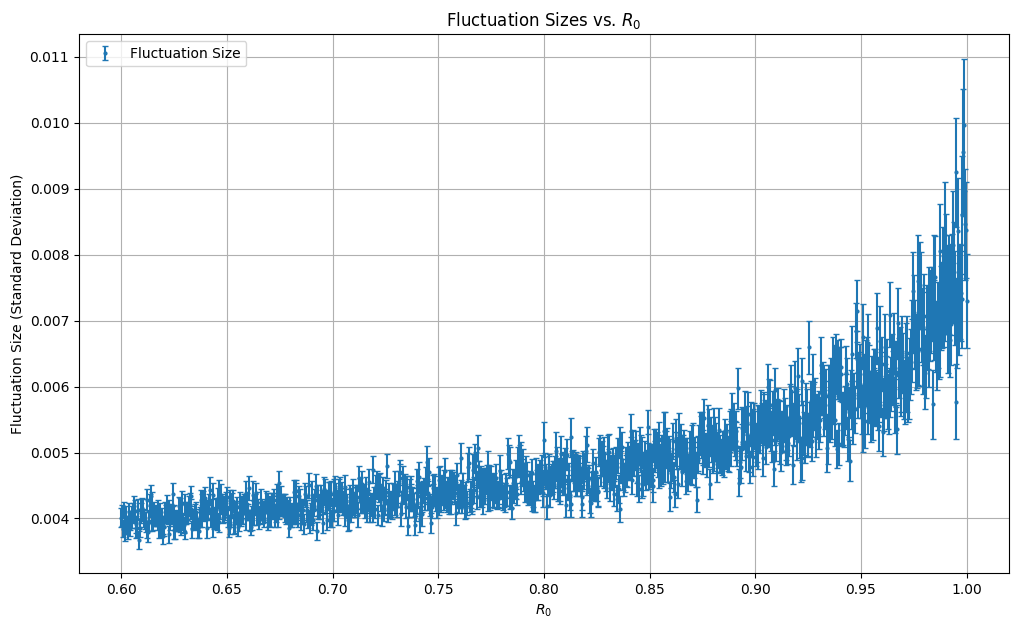

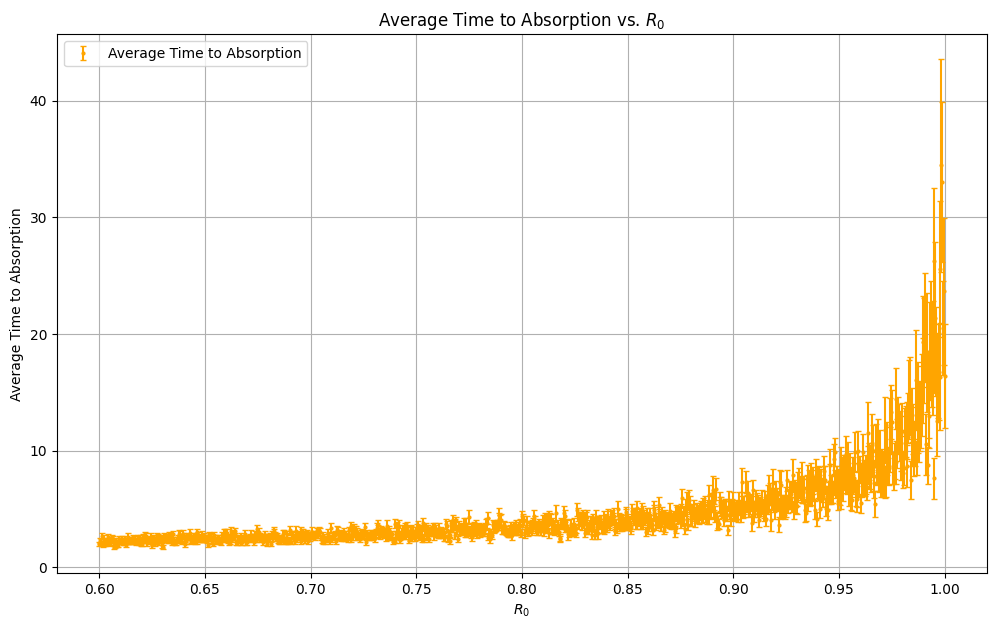

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters
sigma = 0.01       # Standard deviation of the Gaussian noise
dt = 0.01          # Time step
T = 2000           # Total time
N = int(T / dt)    # Maximum number of time steps
M = 100            # Number of simulations per R0
R0_values = np.linspace(0.6, 1, 1000)  # Range of R0 values

initial_shock = 0.01
sigma_sqrt_dt = sigma * np.sqrt(dt)

# Initialize lists to store results
fluctuation_sizes = []
std_errors = []
average_times = []       # List to store average times
std_errors_time = []     # List to store standard errors of times

# Loop over R0 values
for R0 in tqdm(R0_values):
    delta_R0 = R0 - 1

    # Initialize arrays
    x = np.full((N + 1, M), initial_shock)
    alive = np.ones(M, dtype=bool)
    stop_indices = np.full(M, N, dtype=int)

    for i in range(1, N + 1):
        x_prev = x[i - 1, :]
        deterministic = (delta_R0 * x_prev - x_prev**3) * dt
        stochastic = sigma_sqrt_dt * np.random.normal(size=M)
        x_new = x_prev + deterministic + stochastic

        # Update only alive simulations
        x[i, alive] = x_new[alive]
        # Check stopping condition
        newly_dead = x_new <= 0
        stop_indices[newly_dead & alive] = i
        alive &= ~newly_dead

        # Break if all simulations have stopped
        if not np.any(alive):
            x[(i + 1):, :] = x[i, :]
            break

    # Compute fluctuation sizes
    fluctuation_sizes_per_R0 = np.array([
        np.std(x[:stop_indices[sim] + 1, sim] - initial_shock)
        for sim in range(M)
    ])

    # Compute times to absorption
    times = stop_indices * dt

    # Compute average fluctuation size and standard error for current R0
    avg_fluctuation_size = np.mean(fluctuation_sizes_per_R0)
    std_error = np.std(fluctuation_sizes_per_R0) / np.sqrt(M)

    # Compute average time and standard error
    avg_time = np.mean(times)
    std_error_t = np.std(times) / np.sqrt(M)

    fluctuation_sizes.append(avg_fluctuation_size)
    std_errors.append(std_error)
    average_times.append(avg_time)
    std_errors_time.append(std_error_t)

# Convert results to numpy arrays
fluctuation_sizes = np.array(fluctuation_sizes)
std_errors = np.array(std_errors)
average_times = np.array(average_times)
std_errors_time = np.array(std_errors_time)

# Plot average fluctuation size vs R0 with error bars
plt.figure(figsize=(12, 7))
plt.errorbar(R0_values, fluctuation_sizes, yerr=std_errors, fmt='o', markersize=2, capsize=2, label='Fluctuation Size')
plt.xlabel('$R_0$')
plt.ylabel('Fluctuation Size (Standard Deviation)')
plt.title('Fluctuation Sizes vs. $R_0$')
plt.grid(True)
plt.legend()
plt.show()

# Plot average time to absorption vs R0 with error bars
plt.figure(figsize=(12, 7))
plt.errorbar(R0_values, average_times, yerr=std_errors_time, fmt='o', markersize=2, capsize=2, color='orange', label='Average Time to Absorption')
plt.xlabel('$R_0$')
plt.ylabel('Average Time to Absorption')
plt.title('Average Time to Absorption vs. $R_0$')
plt.grid(True)
plt.legend()
plt.show()


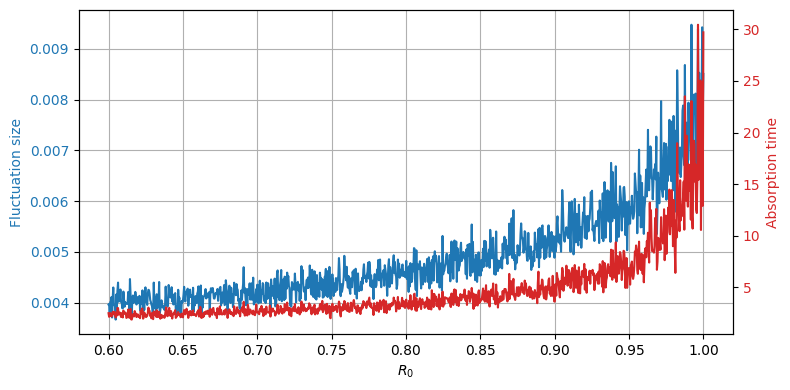

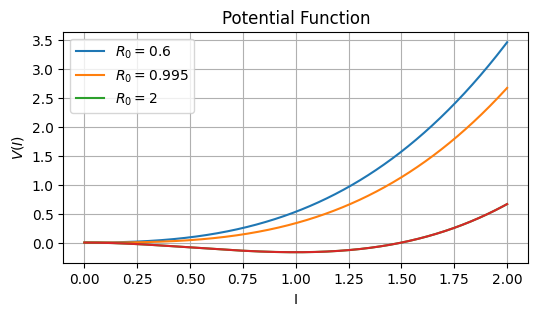

In [46]:
# import numpy as np
# import matplotlib.pyplot as plt
# from tqdm import tqdm

# # Parameters
# sigma = 0.01       # Standard deviation of the Gaussian noise
# dt = 0.01          # Time step
# T = 1000           # Total time
# N = int(T / dt)    # Maximum number of time steps
# M = 100            # Number of simulations per R0
# R0_values = np.linspace(0.6, 1, 1000)  # Range of R0 values

# initial_shock = 0.01
# sigma_sqrt_dt = sigma * np.sqrt(dt)

# # Initialize lists to store results
# fluctuation_sizes = []
# average_times = []       # List to store average times

# # Loop over R0 values
# for R0 in tqdm(R0_values):
#     delta_R0 = R0 - 1

#     # Initialize arrays
#     x = np.full((N + 1, M), initial_shock)
#     alive = np.ones(M, dtype=bool)
#     stop_indices = np.full(M, N, dtype=int)

#     for i in range(1, N + 1):
#         x_prev = x[i - 1, :]
#         # Force calculation inlined
#         deterministic = (delta_R0 * x_prev - x_prev**3) * dt
#         stochastic = sigma_sqrt_dt * np.random.normal(size=M)
#         x_new = x_prev + deterministic + stochastic

#         # Update only alive simulations
#         x[i, alive] = x_new[alive]
#         # Check stopping condition
#         newly_dead = x_new <= 0
#         stop_indices[newly_dead & alive] = i
#         alive &= ~newly_dead

#         # Break if all simulations have stopped
#         if not np.any(alive):
#             x[(i + 1):, :] = x[i, :]
#             break

#     # Compute fluctuation sizes
#     fluctuation_sizes_per_R0 = np.array([
#         np.std(x[:stop_indices[sim] + 1, sim] - initial_shock)
#         for sim in range(M)
#     ])

#     # Compute times to absorption
#     times = stop_indices * dt

#     # Compute average fluctuation size and average time
#     avg_fluctuation_size = np.mean(fluctuation_sizes_per_R0)
#     avg_time = np.mean(times)

#     fluctuation_sizes.append(avg_fluctuation_size)
#     average_times.append(avg_time)

# # Convert results to numpy arrays
# fluctuation_sizes = np.array(fluctuation_sizes)
average_times = np.array(average_times)

# Plotting both average time and fluctuation size on the same figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(8, 4))

color1 = 'tab:blue'
ax1.set_xlabel('$R_0$')
ax1.set_ylabel('Fluctuation size', color=color1)
ax1.plot(R0_values, fluctuation_sizes, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

color2 = 'tab:red'
ax2.set_ylabel('Absorption time', color=color2)
ax2.plot(R0_values, average_times, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()  # Otherwise the right y-label is slightly clipped
ax1.grid(True)

# Add legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.savefig("Fluct_abs_time.pdf",dpi= 400)
plt.show()

# Function to plot the potential function for a given R0
def plot_potential(R0, x_range=(0, 2), num_points=1000):
    x = np.linspace(*x_range, num_points)
    plt.figure(figsize=(6,3))
    for i in R0:
        V = -0.5 * (i - 1) * x**2 + (1/3) * x**3
        plt.plot(x, V, label = "$R_0 = $" + str(i))
    plt.plot(x, V)
    plt.xlabel('I')
    plt.ylabel('$V(I)$')
    plt.title(f'Potential Function')
    plt.grid(True)
    plt.legend()
    plt.savefig("potential_r0.pdf",dpi= 400)
    plt.show()

# Example usage of plot_potential function
plot_potential([0.6,0.995,2])



/var/folders/0g/mj2jqwl51fjfb8vz5shd6hw00000gp/T/ipykernel_71521/3960248394.py:26: DeprecationWarning: You are passing x=[0.         0.002002   0.004004   0.00600601 0.00800801 0.01001001
 0.01201201 0.01401401 0.01601602 0.01801802 0.02002002 0.02202202
 0.02402402 0.02602603 0.02802803 0.03003003 0.03203203 0.03403403
 0.03603604 0.03803804 0.04004004 0.04204204 0.04404404 0.04604605
 0.04804805 0.05005005 0.05205205 0.05405405 0.05605606 0.05805806
 0.06006006 0.06206206 0.06406406 0.06606607 0.06806807 0.07007007
 0.07207207 0.07407407 0.07607608 0.07807808 0.08008008 0.08208208
 0.08408408 0.08608609 0.08808809 0.09009009 0.09209209 0.09409409
 0.0960961  0.0980981  0.1001001  0.1021021  0.1041041  0.10610611
 0.10810811 0.11011011 0.11211211 0.11411411 0.11611612 0.11811812
 0.12012012 0.12212212 0.12412412 0.12612613 0.12812813 0.13013013
 0.13213213 0.13413413 0.13613614 0.13813814 0.14014014 0.14214214
 0.14414414 0.14614615 0.14814815 0.15015015 0.15215215 0.15415415
 0.15615

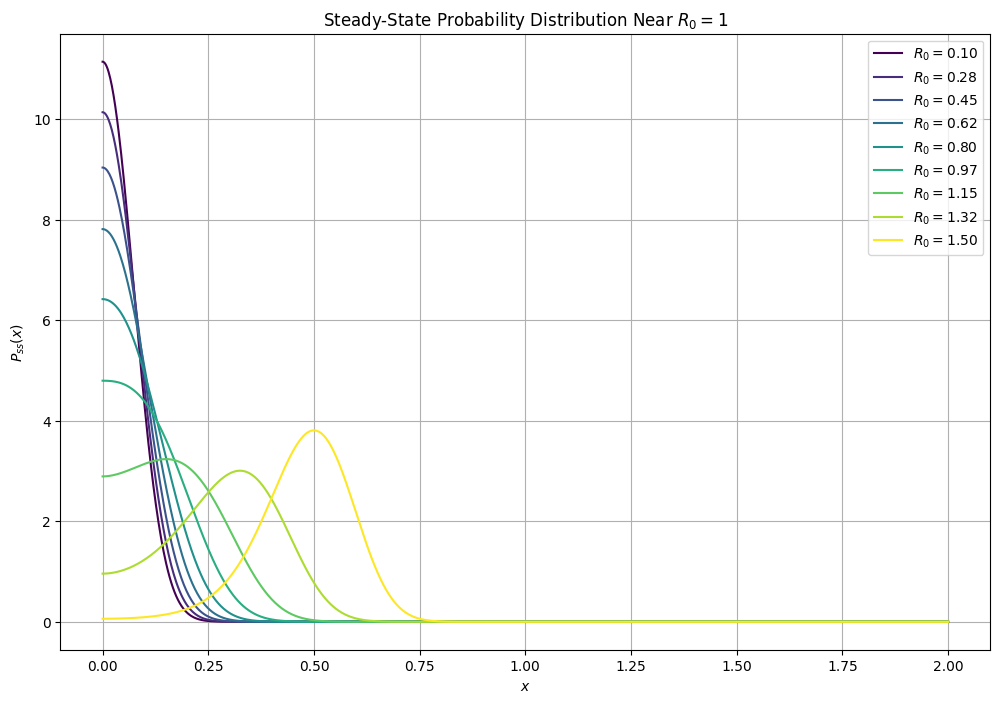

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
import matplotlib.cm as cm

# Parameters
sigma = 0.1
R0_values = np.linspace(0.1, 1.5, 9)  # Finer R0 range near 1
x_min = 0
x_max = 2.0
x_points = 1000

# Create x values
x = np.linspace(x_min, x_max, x_points)

def P_ss(x, R0, sigma):
    exponent = (2 / sigma**2) * (0.5 * (R0 - 1) * x**2 - (1/3) * x**3)
    exponent -= np.max(exponent)
    return np.exp(exponent)

plt.figure(figsize=(12, 8))
colors = cm.viridis(np.linspace(0, 1, len(R0_values)))

for idx, R0 in enumerate(R0_values):
    P_unnormalized = P_ss(x, R0, sigma)
    integral = simpson(P_unnormalized, x)
    P_normalized = P_unnormalized / integral
    plt.plot(x, P_normalized, label=f'$R_0 = {R0:.2f}$', color=colors[idx])

plt.xlabel('$x$')
plt.ylabel('$P_{ss}(x)$')
plt.title('Steady-State Probability Distribution Near $R_0 = 1$')
plt.legend()
plt.grid(True)
plt.show()


Simply fit to above model ffinding best R0 for model, that gives the R0?

/var/folders/0g/mj2jqwl51fjfb8vz5shd6hw00000gp/T/ipykernel_71521/1455420417.py:37: DeprecationWarning: You are passing x=[-1.       -0.997999 -0.995998 ...  2.995998  2.997999  3.      ] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  integral_P = simpson(P_unnormalized, x)
/var/folders/0g/mj2jqwl51fjfb8vz5shd6hw00000gp/T/ipykernel_71521/1455420417.py:42: DeprecationWarning: You are passing x=[-1.       -0.997999 -0.995998 ...  2.995998  2.997999  3.      ] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  mean = simpson(xP, x)
/var/folders/0g/mj2jqwl51fjfb8vz5shd6hw00000gp/T/ipykernel_71521/1455420417.py:46: DeprecationWarning: You are passing x=[-1.       -0.997999 -0.995998 ...  2.995998  2.997999  3.      ] as a positional argument. Please change your invo

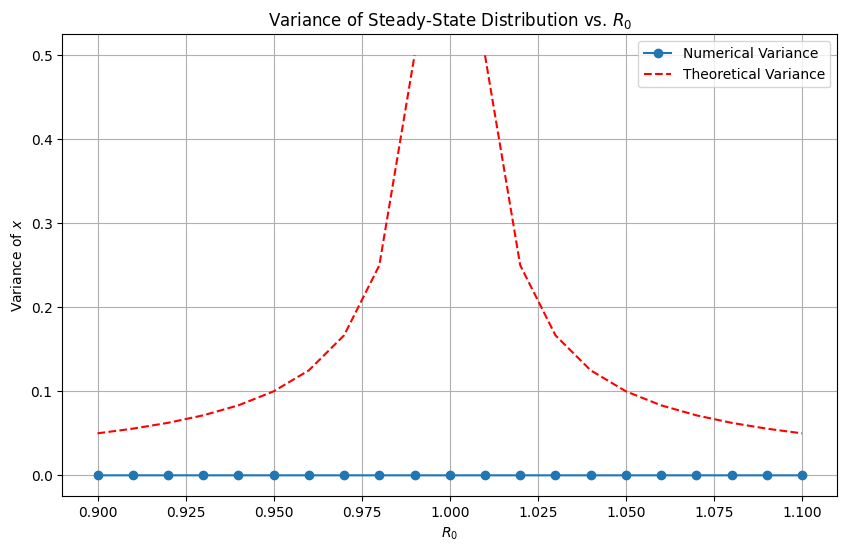

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

# Parameters
sigma = 0.1
R0_values = np.linspace(0.9, 1.1, 21)  # R0 values around the critical point
x_min = -1.0
x_max = 3.0
x_points = 2000

# Create x values
x = np.linspace(x_min, x_max, x_points)

# Theoretical variance function
def theoretical_variance(R0, sigma):
    if R0 != 1:
        return sigma**2 / (2 * abs(R0 - 1))
    else:
        return np.inf  # Variance diverges at R0 = 1

# Arrays to store results
numerical_variances = []
theoretical_variances = []

# Function to compute unnormalized P_ss(x)
def P_ss(x, R0, sigma):
    exponent = (2 / sigma**2) * (0.5 * (R0 - 1) * x**2 - (1/3) * x**3)
    exponent -= np.max(exponent)  # Prevent overflow
    return np.exp(exponent)

for R0 in R0_values:
    # Compute unnormalized probability density
    P_unnormalized = P_ss(x, R0, sigma)
    
    # Normalize the probability density
    integral_P = simpson(P_unnormalized, x)
    P_normalized = P_unnormalized / integral_P
    
    # Compute mean
    xP = x * P_normalized
    mean = simpson(xP, x)
    
    # Compute variance
    x2P = x**2 * P_normalized
    mean_x2 = simpson(x2P, x)
    variance = mean_x2 - mean**2
    numerical_variances.append(variance)
    
    # Compute theoretical variance
    if R0 != 1:
        var_theoretical = theoretical_variance(R0, sigma)
    else:
        var_theoretical = np.nan  # Avoid division by zero
    theoretical_variances.append(var_theoretical)

# Convert lists to arrays
numerical_variances = np.array(numerical_variances)
theoretical_variances = np.array(theoretical_variances)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(R0_values, numerical_variances, 'o-', label='Numerical Variance')
plt.plot(R0_values, theoretical_variances, 'r--', label='Theoretical Variance')
plt.xlabel('$R_0$')
plt.ylabel('Variance of $x$')
plt.title('Variance of Steady-State Distribution vs. $R_0$')
plt.legend()
plt.grid(True)
plt.show()
